In [13]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [15]:
df = pd.read_csv(r"C:\Users\Raksha Chavan\Downloads\archive (19)\Iris.csv")
df.head(3)

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa


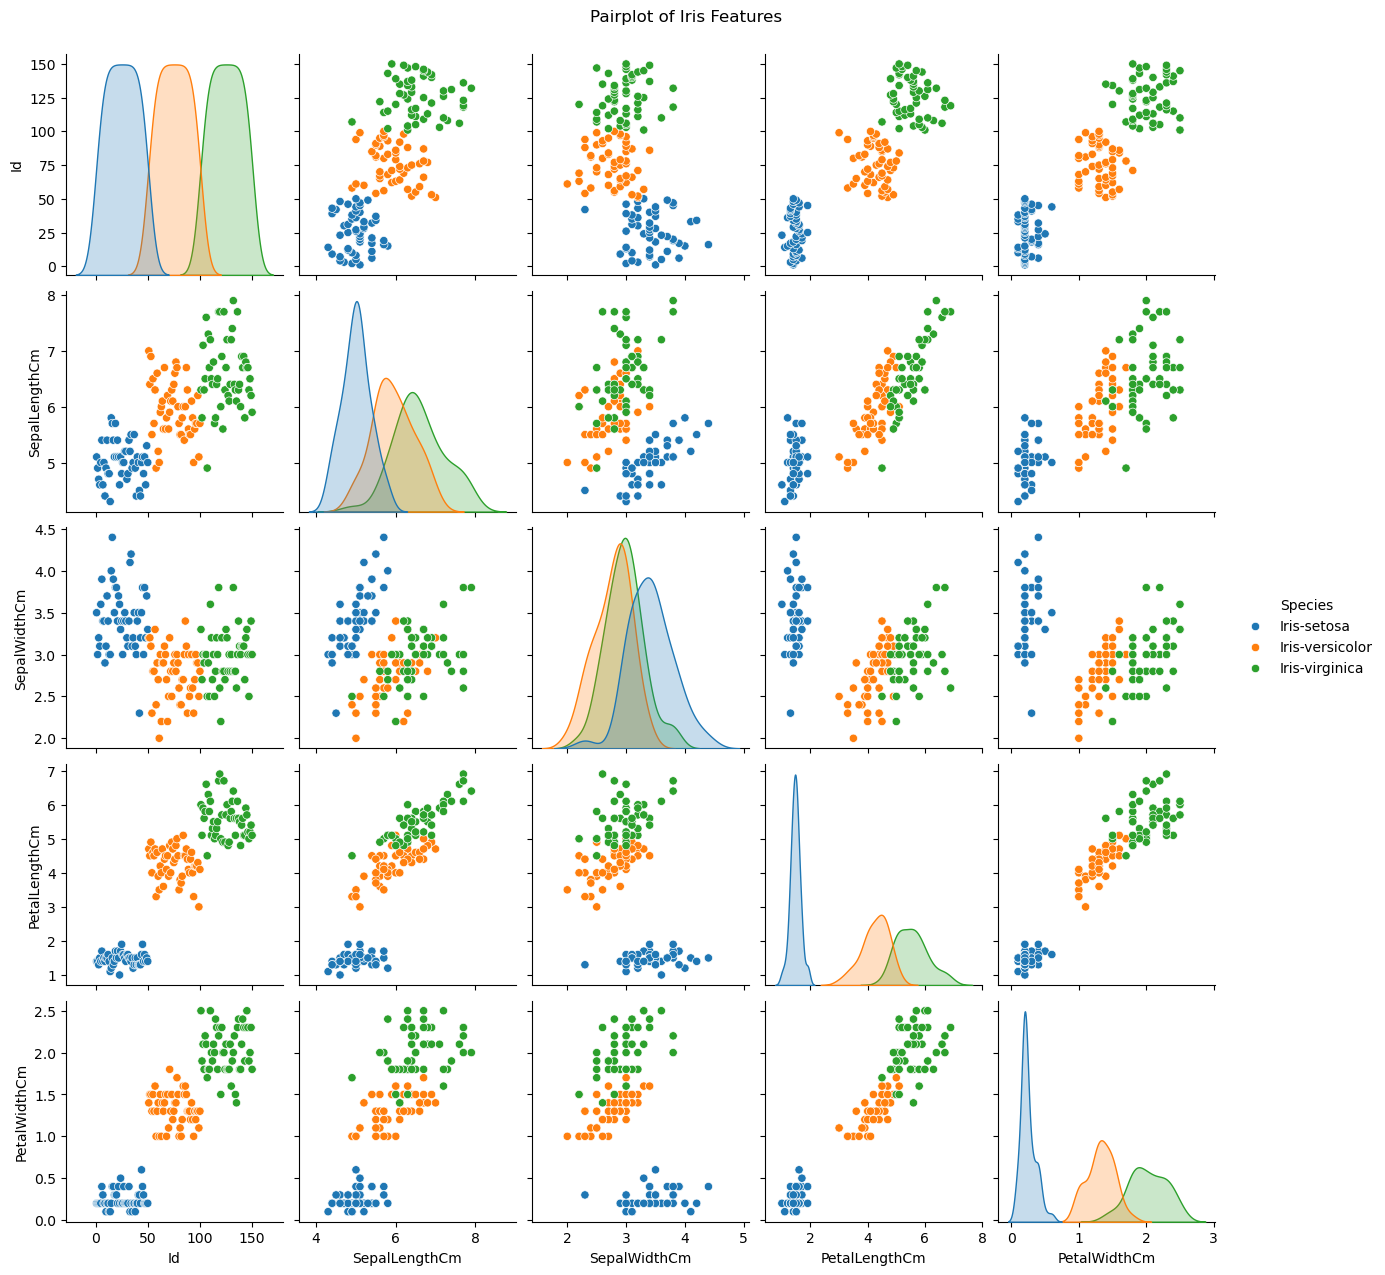

In [45]:
sns.pairplot(df, hue='Species', diag_kind='kde')
plt.suptitle("Pairplot of Iris Features", y=1.02)
plt.show()


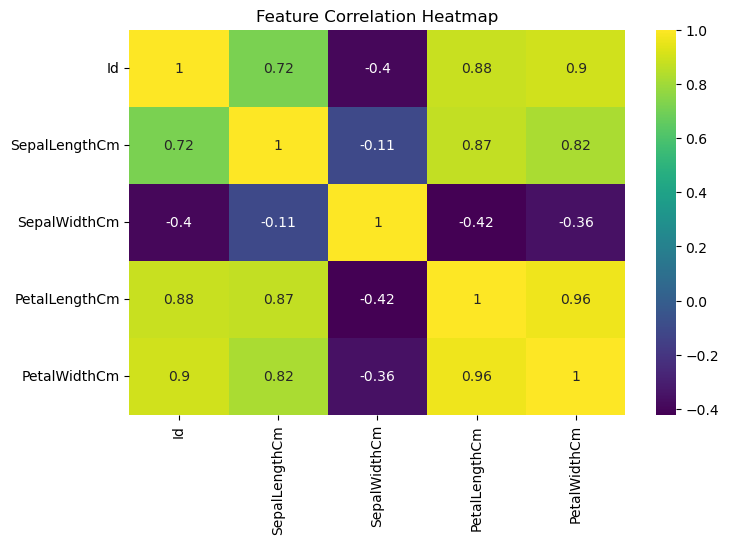

In [47]:
plt.figure(figsize=(8, 5))
sns.heatmap(df.drop('Species', axis=1).corr(), annot=True, cmap='viridis')
plt.title("Feature Correlation Heatmap")
plt.show()


In [19]:
X = df.drop('Species', axis=1)
y = df['Species']


In [31]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

In [33]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y)


In [35]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [37]:
model = LogisticRegression(max_iter=200)
model.fit(X_train_scaled, y_train)


LogisticRegression(max_iter=200)

In [39]:
y_pred = model.predict(X_test_scaled)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))


Accuracy: 1.0

Confusion Matrix:
 [[10  0  0]
 [ 0 10  0]
 [ 0  0 10]]

Classification Report:
                  precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        10
Iris-versicolor       1.00      1.00      1.00        10
 Iris-virginica       1.00      1.00      1.00        10

       accuracy                           1.00        30
      macro avg       1.00      1.00      1.00        30
   weighted avg       1.00      1.00      1.00        30



In [41]:
sample = [[5.1, 3.5, 1.4, 0.2]]
sample_scaled = scaler.transform(sample)

prediction = model.predict(sample_scaled)
print("Predicted Species:", prediction[0])


C:\ProgramData\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


ValueError: X has 4 features, but StandardScaler is expecting 5 features as input.